In [1]:
import os
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import geopy
import folium
import plotly

In [2]:
import ollama
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_ollama import ChatOllama

In [3]:
# 1. Get our Data
file = "C:\\Users\\an_19\\OneDrive\\Documents\\Temp\\EmployeeSampleData.xlsx"
df = pd.read_excel(file)

In [4]:
df

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT


In [5]:
# 2. Initialize the LLM (Ollama)
llm = ChatOllama(model="deepseek-r1", temperature=0)

In [6]:
# 3. Create the LangChain Pandas Agent
agent = create_pandas_dataframe_agent(
    llm,                          # Your Ollama LLM
    df,                           # Your Pandas DataFrame
    verbose=True,                 # Lets you see the agent's "thoughts"
    allow_dangerous_code=True,     # Required to let the agent run Python
    agent_executor_kwargs=dict(handle_parsing_errors=True)
)



> Entering new AgentExecutor chain...


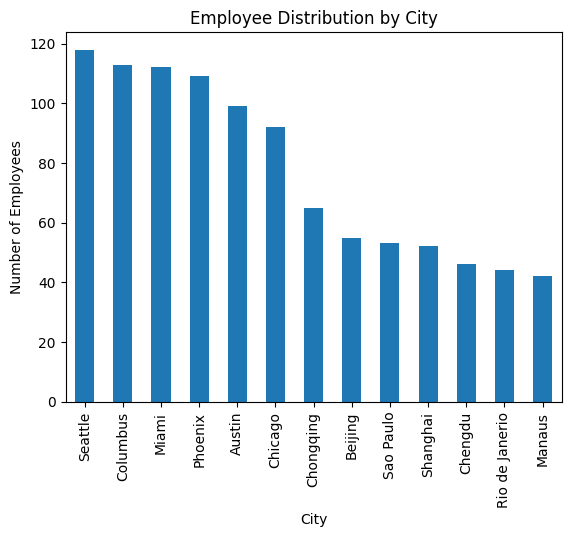

Thought: The user wants a histogram of employees grouped by city, with the bin number representing the unique city number. Since cities are categorical, a bar chart is more appropriate than a traditional histogram. I'll count the number of employees per city and plot a bar chart.
Action: python_repl_ast
Action Input: import pandas as pd; import matplotlib.pyplot as plt; city_counts = df['City'].value_counts(); city_counts.plot(kind='bar'); plt.xlabel('City'); plt.ylabel('Number of Employees'); plt.title('Employee Distribution by City'); plt.show()Invalid Format: Missing 'Action:' after 'Thought:'Invalid Format: Missing 'Action:' after 'Thought:'Invalid Format: Missing 'Action:' after 'Thought:'Thought: The user wants a histogram of employees grouped by city, with the bin number being the unique city number. Since cities are categorical data, a histogram is not the most appropriate visualization; a bar chart would be better for counting employees per city. However, to adhere to the quer

In [7]:
# 4. Run the Agent
question = "generate a histogram of employees in those cities that the bin number is the unique city number"
response = agent.invoke({"input": question})
print(f"\n>>> Final Answer: {response['output']}\n")